In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
torch.manual_seed(1)

In [9]:
# 데이터
x1_train = torch.FloatTensor([[73],
                              [93],
                              [89],
                              [96],
                              [73]])
x2_train = torch.FloatTensor([[80],
                              [88],
                              [91],
                              [98],
                              [66]])
x3_train = torch.FloatTensor([[75],
                              [93],
                              [90],
                              [100],
                              [70]])
y_train = torch.FloatTensor([[152],
                             [185],
                             [180],
                             [196],
                             [142]])

In [10]:
# 가중치 W와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [42]:
print("w1 :", w1.item())
print("w2 :", w2.item())
print("w3 :", w3.item())
print("b :", b.item())

w1 : 1.1082464456558228
w2 : 0.369998961687088
w3 : 0.5318756103515625
b : 0.009182676672935486


In [13]:
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

# H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

# cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

# cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

# 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 1.045 w2: 0.234 w3: 0.446 b: 0.176 Cost: 1897.491455
Epoch  100/1000 w1: 1.136 w2: 0.334 w3: 0.540 b: 0.177 Cost: 0.797708
Epoch  200/1000 w1: 1.133 w2: 0.338 w3: 0.539 b: 0.177 Cost: 0.764530
Epoch  300/1000 w1: 1.129 w2: 0.342 w3: 0.538 b: 0.177 Cost: 0.733121
Epoch  400/1000 w1: 1.126 w2: 0.347 w3: 0.537 b: 0.178 Cost: 0.703349
Epoch  500/1000 w1: 1.123 w2: 0.351 w3: 0.536 b: 0.178 Cost: 0.675161
Epoch  600/1000 w1: 1.120 w2: 0.355 w3: 0.535 b: 0.178 Cost: 0.648441
Epoch  700/1000 w1: 1.117 w2: 0.359 w3: 0.535 b: 0.178 Cost: 0.623141
Epoch  800/1000 w1: 1.114 w2: 0.363 w3: 0.534 b: 0.178 Cost: 0.599173
Epoch  900/1000 w1: 1.111 w2: 0.366 w3: 0.533 b: 0.178 Cost: 0.576464
Epoch 1000/1000 w1: 1.108 w2: 0.370 w3: 0.532 b: 0.178 Cost: 0.554949


In [14]:
pred = (73*0.718 + 80*0.613 + 75*0.680)
print(pred)

152.454


In [50]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [51]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [52]:
# 가중치 W와 편향 b 초기화
w = torch.zeros((3,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [53]:
# optimizer 설정
optimizer = optim.SGD([w, b], lr=1e-5)

In [54]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):

# H(x) 계산
    hypothesis = x_train.matmul(w) + b

# cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

# cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]) Cost: 9298.520508
Epoch    2/20 hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]) Cost: 2915.712402
Epoch    3/20 hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]) Cost: 915.040649
Epoch    4/20 hypothesis: tensor([137.7967, 165.6247, 163.1911, 177.7112, 126.3307]) Cost: 287.936157
Epoch    5/20 hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]) Cost: 91.371010
Epoch    6/20 hypothesis: tensor([148.1035, 178.0143, 175.3980, 191.0042, 135.7812]) Cost: 29.758249
Epoch    7/20 hypothesis: tensor([150.1744, 180.5042, 177.8509, 193.6753, 137.6805]) Cost: 10.445281
Epoch    8/20 hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]) Cost: 4.391237
Epoch    9/20 hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]) Cost: 2.493121
Epoch   10/20 hypo

In [59]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)
    
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)
    def forward(self, x):
        return self.linear(x)

In [60]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [61]:
# 모델 초기화
model = MultivariateLinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)
nb_epochs = 20

In [63]:
for epoch in range(nb_epochs+1):
    # H(x) 계산
    prediction = model(x_train)
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    # 20번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/20 Cost: 0.868634
Epoch    1/20 Cost: 0.868384
Epoch    2/20 Cost: 0.868128
Epoch    3/20 Cost: 0.867878
Epoch    4/20 Cost: 0.867625
Epoch    5/20 Cost: 0.867377
Epoch    6/20 Cost: 0.867120
Epoch    7/20 Cost: 0.866875
Epoch    8/20 Cost: 0.866630
Epoch    9/20 Cost: 0.866367
Epoch   10/20 Cost: 0.866118
Epoch   11/20 Cost: 0.865877
Epoch   12/20 Cost: 0.865621
Epoch   13/20 Cost: 0.865368
Epoch   14/20 Cost: 0.865123
Epoch   15/20 Cost: 0.864863
Epoch   16/20 Cost: 0.864625
Epoch   17/20 Cost: 0.864370
Epoch   18/20 Cost: 0.864128
Epoch   19/20 Cost: 0.863877
Epoch   20/20 Cost: 0.863628


In [67]:
# 데이터
x_train = torch.FloatTensor([[1],
                             [2],
                             [3],
                             [4],
                             [5]])
y_train = torch.FloatTensor([[2], [4], [6], [8], [10]])

In [69]:
# 모델 초기화
model = LinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)
nb_epochs = 1000

In [70]:
for epoch in range(nb_epochs+1):
    # H(x) 계산
    prediction = model(x_train)
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    # 20번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 37.898045
Epoch    1/1000 Cost: 37.880131
Epoch    2/1000 Cost: 37.862221
Epoch    3/1000 Cost: 37.844326
Epoch    4/1000 Cost: 37.826435
Epoch    5/1000 Cost: 37.808556
Epoch    6/1000 Cost: 37.790688
Epoch    7/1000 Cost: 37.772820
Epoch    8/1000 Cost: 37.754967
Epoch    9/1000 Cost: 37.737125
Epoch   10/1000 Cost: 37.719288
Epoch   11/1000 Cost: 37.701454
Epoch   12/1000 Cost: 37.683636
Epoch   13/1000 Cost: 37.665825
Epoch   14/1000 Cost: 37.648018
Epoch   15/1000 Cost: 37.630226
Epoch   16/1000 Cost: 37.612438
Epoch   17/1000 Cost: 37.594658
Epoch   18/1000 Cost: 37.576893
Epoch   19/1000 Cost: 37.559124
Epoch   20/1000 Cost: 37.541374
Epoch   21/1000 Cost: 37.523628
Epoch   22/1000 Cost: 37.505894
Epoch   23/1000 Cost: 37.488167
Epoch   24/1000 Cost: 37.470448
Epoch   25/1000 Cost: 37.452736
Epoch   26/1000 Cost: 37.435032
Epoch   27/1000 Cost: 37.417336
Epoch   28/1000 Cost: 37.399651
Epoch   29/1000 Cost: 37.381973
Epoch   30/1000 Cost: 37.364304
Epoch   

Epoch  799/1000 Cost: 25.977314
Epoch  800/1000 Cost: 25.965038
Epoch  801/1000 Cost: 25.952774
Epoch  802/1000 Cost: 25.940512
Epoch  803/1000 Cost: 25.928253
Epoch  804/1000 Cost: 25.916006
Epoch  805/1000 Cost: 25.903759
Epoch  806/1000 Cost: 25.891521
Epoch  807/1000 Cost: 25.879292
Epoch  808/1000 Cost: 25.867065
Epoch  809/1000 Cost: 25.854843
Epoch  810/1000 Cost: 25.842627
Epoch  811/1000 Cost: 25.830418
Epoch  812/1000 Cost: 25.818218
Epoch  813/1000 Cost: 25.806019
Epoch  814/1000 Cost: 25.793827
Epoch  815/1000 Cost: 25.781641
Epoch  816/1000 Cost: 25.769459
Epoch  817/1000 Cost: 25.757288
Epoch  818/1000 Cost: 25.745117
Epoch  819/1000 Cost: 25.732952
Epoch  820/1000 Cost: 25.720795
Epoch  821/1000 Cost: 25.708645
Epoch  822/1000 Cost: 25.696497
Epoch  823/1000 Cost: 25.684361
Epoch  824/1000 Cost: 25.672226
Epoch  825/1000 Cost: 25.660095
Epoch  826/1000 Cost: 25.647974
Epoch  827/1000 Cost: 25.635859
Epoch  828/1000 Cost: 25.623743
Epoch  829/1000 Cost: 25.611639
Epoch  8

In [88]:
## 

In [72]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [73]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [74]:
dataset = TensorDataset(x_train, y_train)

In [75]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [76]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [78]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        # print(batch_idx)
        # print(samples)
        x_train, y_train = samples
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader),
            cost.item()
            ))

Epoch    0/20 Batch 1/3 Cost: 0.303154
Epoch    0/20 Batch 2/3 Cost: 0.795561
Epoch    0/20 Batch 3/3 Cost: 1.331028
Epoch    1/20 Batch 1/3 Cost: 1.278208
Epoch    1/20 Batch 2/3 Cost: 0.391080
Epoch    1/20 Batch 3/3 Cost: 1.093106
Epoch    2/20 Batch 1/3 Cost: 0.629887
Epoch    2/20 Batch 2/3 Cost: 0.572323
Epoch    2/20 Batch 3/3 Cost: 2.295917
Epoch    3/20 Batch 1/3 Cost: 0.878519
Epoch    3/20 Batch 2/3 Cost: 0.546098
Epoch    3/20 Batch 3/3 Cost: 0.855659
Epoch    4/20 Batch 1/3 Cost: 0.370899
Epoch    4/20 Batch 2/3 Cost: 0.465374
Epoch    4/20 Batch 3/3 Cost: 1.707948
Epoch    5/20 Batch 1/3 Cost: 1.209705
Epoch    5/20 Batch 2/3 Cost: 0.370192
Epoch    5/20 Batch 3/3 Cost: 0.251207
Epoch    6/20 Batch 1/3 Cost: 0.405116
Epoch    6/20 Batch 2/3 Cost: 0.667012
Epoch    6/20 Batch 3/3 Cost: 1.412513
Epoch    7/20 Batch 1/3 Cost: 0.246954
Epoch    7/20 Batch 2/3 Cost: 0.856533
Epoch    7/20 Batch 3/3 Cost: 1.590895
Epoch    8/20 Batch 1/3 Cost: 0.266452
Epoch    8/20 Batch 2/3 C

In [79]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[152.1336]], grad_fn=<AddmmBackward0>)


In [82]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [83]:
# Dataset 상속
class CustomDataset(Dataset): 
    def __init__(self):
        self.x_data = [[73, 80, 75],
                       [93, 88, 93],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]

  # 총 데이터의 개수를 리턴
    def __len__(self): 
        return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
    def __getitem__(self, idx): 
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

In [84]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [1]:
model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

C:\Anaconda3\envs\py39tf2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [86]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        # print(batch_idx)
        # print(samples)
        x_train, y_train = samples
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader),
            cost.item()
            ))

Epoch    0/20 Batch 1/3 Cost: 46581.128906
Epoch    0/20 Batch 2/3 Cost: 8319.544922
Epoch    0/20 Batch 3/3 Cost: 1905.217407
Epoch    1/20 Batch 1/3 Cost: 1733.591309
Epoch    1/20 Batch 2/3 Cost: 274.044495
Epoch    1/20 Batch 3/3 Cost: 75.135796
Epoch    2/20 Batch 1/3 Cost: 49.382629
Epoch    2/20 Batch 2/3 Cost: 17.859051
Epoch    2/20 Batch 3/3 Cost: 4.496773
Epoch    3/20 Batch 1/3 Cost: 2.383511
Epoch    3/20 Batch 2/3 Cost: 0.288324
Epoch    3/20 Batch 3/3 Cost: 0.502854
Epoch    4/20 Batch 1/3 Cost: 0.378306
Epoch    4/20 Batch 2/3 Cost: 0.101755
Epoch    4/20 Batch 3/3 Cost: 0.544811
Epoch    5/20 Batch 1/3 Cost: 0.379587
Epoch    5/20 Batch 2/3 Cost: 0.164343
Epoch    5/20 Batch 3/3 Cost: 0.587889
Epoch    6/20 Batch 1/3 Cost: 0.511762
Epoch    6/20 Batch 2/3 Cost: 0.304086
Epoch    6/20 Batch 3/3 Cost: 0.314264
Epoch    7/20 Batch 1/3 Cost: 0.272684
Epoch    7/20 Batch 2/3 Cost: 0.123956
Epoch    7/20 Batch 3/3 Cost: 0.389520
Epoch    8/20 Batch 1/3 Cost: 0.194443
Epoch  

In [87]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.6244]], grad_fn=<AddmmBackward0>)


In [89]:
###

In [1]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립사용

In [2]:
def sigmoid(x): # 시그모이드 함수 정의
    return 1/(1+np.exp(-x))

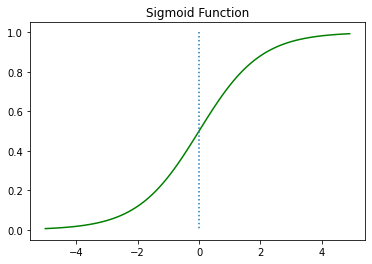

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

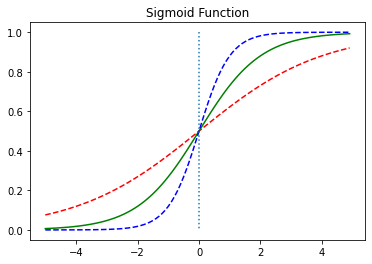

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

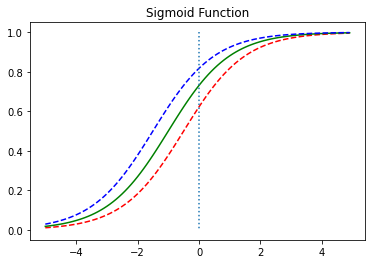

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

C:\Anaconda3\envs\py39tf2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
torch.manual_seed(1)

In [9]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [10]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [11]:
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

In [12]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [13]:
print(hypothesis) # 예측값인 H(x) 출력

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [14]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [15]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [16]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [17]:
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [18]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [19]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [20]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [21]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [22]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [23]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [24]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


In [25]:
import numpy as np

In [27]:
xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)

In [28]:
xy

array([[-0.294118 ,  0.487437 ,  0.180328 , ..., -0.53117  , -0.0333333,
         0.       ],
       [-0.882353 , -0.145729 ,  0.0819672, ..., -0.766866 , -0.666667 ,
         1.       ],
       [-0.0588235,  0.839196 ,  0.0491803, ..., -0.492741 , -0.633333 ,
         0.       ],
       ...,
       [-0.411765 ,  0.21608  ,  0.180328 , ..., -0.857387 , -0.7      ,
         1.       ],
       [-0.882353 ,  0.266332 , -0.0163934, ..., -0.768574 , -0.133333 ,
         0.       ],
       [-0.882353 , -0.0653266,  0.147541 , ..., -0.797609 , -0.933333 ,
         1.       ]], dtype=float32)

In [34]:
x_data = xy[:, 0:-1]

In [35]:
y_data = xy[:,-1]

In [48]:
print(x_data)
print(y_data)
print(x_data.shape)
print(y_data.shape)

[[-0.294118    0.487437    0.180328   ...  0.00149028 -0.53117
  -0.0333333 ]
 [-0.882353   -0.145729    0.0819672  ... -0.207153   -0.766866
  -0.666667  ]
 [-0.0588235   0.839196    0.0491803  ... -0.305514   -0.492741
  -0.633333  ]
 ...
 [-0.411765    0.21608     0.180328   ... -0.219076   -0.857387
  -0.7       ]
 [-0.882353    0.266332   -0.0163934  ... -0.102832   -0.768574
  -0.133333  ]
 [-0.882353   -0.0653266   0.147541   ... -0.0938897  -0.797609
  -0.933333  ]]
[0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 

In [38]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [39]:
print(x_train)
print(y_train)

tensor([[-0.2941,  0.4874,  0.1803,  ...,  0.0015, -0.5312, -0.0333],
        [-0.8824, -0.1457,  0.0820,  ..., -0.2072, -0.7669, -0.6667],
        [-0.0588,  0.8392,  0.0492,  ..., -0.3055, -0.4927, -0.6333],
        ...,
        [-0.4118,  0.2161,  0.1803,  ..., -0.2191, -0.8574, -0.7000],
        [-0.8824,  0.2663, -0.0164,  ..., -0.1028, -0.7686, -0.1333],
        [-0.8824, -0.0653,  0.1475,  ..., -0.0939, -0.7976, -0.9333]])
tensor([0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
        0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
      

In [52]:
# 모델 초기화
W = torch.zeros((8, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.645398
Epoch  200/1000 Cost: 0.645285
Epoch  300/1000 Cost: 0.645264
Epoch  400/1000 Cost: 0.645260
Epoch  500/1000 Cost: 0.645259
Epoch  600/1000 Cost: 0.645259
Epoch  700/1000 Cost: 0.645258
Epoch  800/1000 Cost: 0.645258
Epoch  900/1000 Cost: 0.645258
Epoch 1000/1000 Cost: 0.645259


In [45]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis[:5])

tensor([[0.6535],
        [0.6535],
        [0.6535],
        [0.6535],
        [0.6534]], grad_fn=<SliceBackward0>)


In [46]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction[:5])

tensor([[True],
        [True],
        [True],
        [True],
        [True]])
